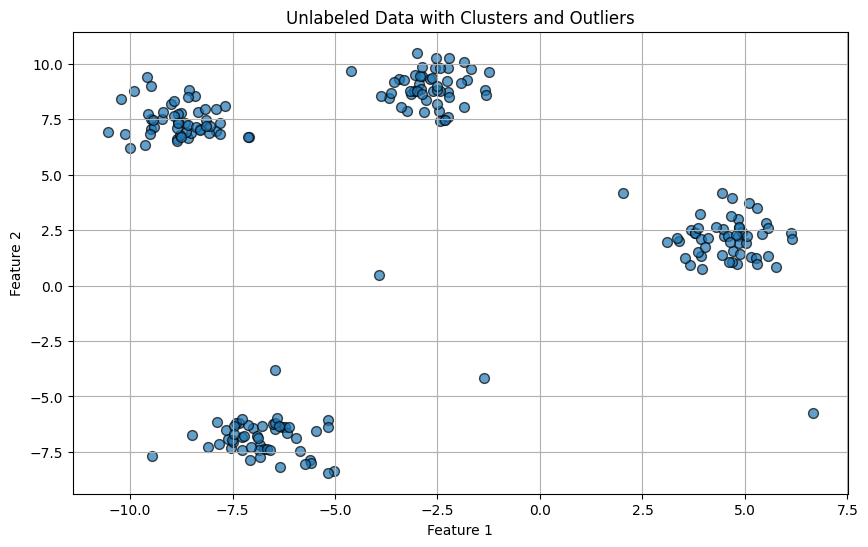

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# --- 1a: Generate the core clusters ---
X_clusters, y_clusters = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=0.8)

# --- 1b: Create some outliers ---
# We'll create 10 random points far away from the main clusters
np.random.seed(42)
X_outliers = np.random.uniform(low=-10, high=10, size=(10, 2))

# --- 1c: Combine the clusters and outliers ---
X = np.vstack([X_clusters, X_outliers])
# --- 1d: Visualize the final dataset ---
plt.figure(figsize=(10, 6))
# We plot all points in a single color to show it's "unlabeled"
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k', alpha=0.7)

plt.title('Unlabeled Data with Clusters and Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [6]:
# Make sure you have installed the library first!
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# --- 2a: Create an instance of the k-Medoids model ---
# We must specify the number of clusters we are looking for.
k = 4
model = KMedoids(n_clusters=k, random_state=42)

# --- 2b: Train the model ---
# The .fit() method will perform the clustering and find the medoids.
print(f"--- Running k-Medoids to find {k} clusters ---")
model.fit(X)
print("--- Clustering Complete ---")


# --- 2c: Inspect the results ---
# The trained model stores the results in its attributes.

# 'labels_' gives the cluster assignment for each data point.
cluster_labels = model.labels_

# 'cluster_centers_' gives the coordinates of the medoids.
# Remember, these are actual points from our dataset!
medoids = model.cluster_centers_

print(f"\nThe algorithm has assigned each point to one of {len(np.unique(cluster_labels))} clusters.")
print("\nThe coordinates of the 4 medoids are:")
print(medoids)

--- Running k-Medoids to find 4 clusters ---
--- Clustering Complete ---

The algorithm has assigned each point to one of 4 clusters.

The coordinates of the 4 medoids are:
[[-6.89634847 -6.78624769]
 [ 4.65028035  3.13599695]
 [ 4.63987884  1.97316968]
 [-3.88913189  8.5644561 ]]


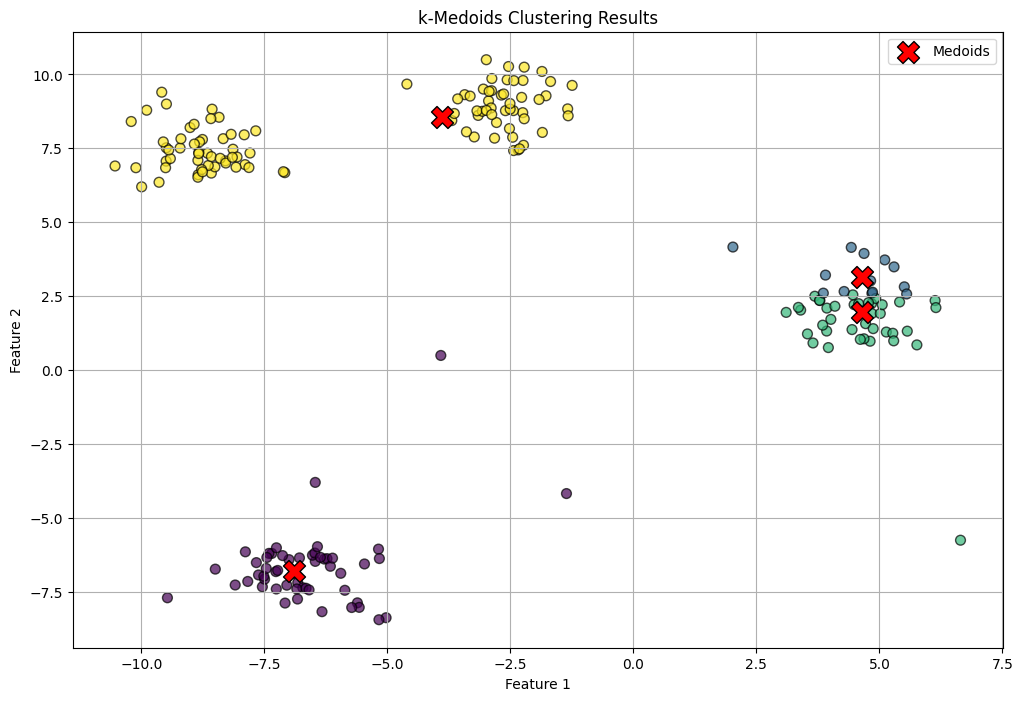

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# --- 3a: Get the results from our trained model ---
# The cluster assignment for each point (0, 1, 2, or 3)
cluster_labels = model.labels_
# The coordinates of the 4 medoids
medoids = model.cluster_centers_

# --- 3b: Create the plot ---
plt.figure(figsize=(12, 8))

# Create a scatter plot of all data points, colored by their assigned cluster label.
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot the medoids on top. We'll make them large, red 'X's to stand out.
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=250, marker='X', edgecolor='k', label='Medoids')

# --- 3c: Add labels and a title ---
plt.title('k-Medoids Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()